In [135]:
#from google.colab import files
#uploaded = files.upload()

In [136]:
#!wget https://github.com/samimcloud2020/aws-sagemaker/blob/main/Tensorflow/laptop.csv

In [137]:
!ls


'laptop (1).csv'   laptop.csv   sample_data


In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# read the csv file
df = pd.read_csv('laptop (1).csv')
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [139]:
df = df[['RAM','Weight','Price']]

In [140]:
df.head()

,RAM,Weight,Price
0,8GB,1.37kg,11912523.48
1,8GB,1.34kg,7993374.48
2,8GB,1.86kg,5112900.00
3,16GB,1.83kg,22563005.40
4,8GB,1.37kg,16037611.20


In [141]:
df['RAM'] = df["RAM"].str.split("G", n = 1, expand = True)[0]
df['Weight'] = df["Weight"].str.split("k", n = 1, expand = True)[0]

In [142]:
df.head()

,RAM,Weight,Price
0,8,1.37,11912523.48
1,8,1.34,7993374.48
2,8,1.86,5112900.00
3,16,1.83,22563005.40
4,8,1.37,16037611.20


In [143]:
df['RAM'].unique()

array(['8', '16', '4', '2', '12', '6', '32', '24'], dtype=object)

In [144]:
df['RAM'] = df['RAM'].astype(int)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RAM     977 non-null    int64  
 1   Weight  977 non-null    object 
 2   Price   977 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.0+ KB


In [146]:
df['RAM'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24])

In [147]:
list = [ 8, 16,  4,  2, 12,  6, 32, 24]

In [148]:
def fun1(x):
  i = 0
  while i < len(list):
    if list[i] == x & x == 2:
      return 1
    elif list[i] == x & x == 4:
      return 2
    elif list[i] == x & x == 6:
      return 3
    elif list[i] == x & x == 8:
      return 4
    elif list[i] == x & x == 12:
      return 5
    elif list[i] == x & x == 16:
      return 6
    elif list[i] == x & x == 24:
      return 7
    elif list[i] == x & x == 32:
      return 8
    else:
      pass
    i += 1



In [149]:
df['RAM'] = df['RAM'].apply(fun1)

In [150]:
df.head()

,RAM,Weight,Price
0,4,1.37,11912523.48
1,4,1.34,7993374.48
2,4,1.86,5112900.00
3,6,1.83,22563005.40
4,4,1.37,16037611.20


In [151]:
df['RAM'].unique()

array([4, 6, 2, 1, 5, 3, 8, 7])

In [152]:
try:
    %tensorflow_version 2.x  #google colab only
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.13.0


In [153]:
X = df.drop(columns =['Price'])
y = df['Price']

X

,RAM,Weight
0,4,1.37
1,4,1.34
2,4,1.86
3,6,1.83
4,4,1.37
...,...,...
972,8,4.42
973,4,1.95
974,6,2.73
975,4,2.04


In [154]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [155]:
y = y.reshape(-1,1)

In [156]:
X


array([[4.  , 1.37],
       [4.  , 1.34],
       [4.  , 1.86],
       ...,
       [6.  , 2.73],
       [4.  , 2.04],
       [2.  , 1.7 ]], dtype=float32)

In [157]:
y


array([[11912523. ],
       [ 7993374.5],
       [ 5112900. ],
       [22563006. ],
       [16037611. ],
       [ 3556800. ],
       [19028614. ],
       [10303160. ],
       [13293540. ],
       [ 6846840. ],
       [ 3502558.8],
       [ 3067651. ],
       [21696214. ],
       [ 4436219. ],
       [11225261. ],
       [13502947. ],
       [ 6624540. ],
       [25413336. ],
       [ 4437108. ],
       [ 8705268. ],
       [ 1706374.8],
       [ 8883108. ],
       [ 2294136. ],
       [ 7282548. ],
       [ 5859828. ],
       [ 3722547. ],
       [ 9772308. ],
       [ 7113600. ],
       [11541816. ],
       [ 7967232. ],
       [ 2178451. ],
       [ 1769508. ],
       [ 3903588. ],
       [16619148. ],
       [ 8874216. ],
       [ 2214108. ],
       [ 3263364. ],
       [ 8705268. ],
       [ 4345431.5],
       [ 7816068. ],
       [ 3458988. ],
       [13329108. ],
       [ 4650427. ],
       [ 6064344. ],
       [ 8883108. ],
       [12617748. ],
       [ 3281148. ],
       [11550

In [158]:
X.shape


(977, 2)

In [159]:
y.shape


(977, 1)

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

In [161]:
N , D = X_train.shape


In [162]:
N , D


(654, 2)

In [163]:
X_test.shape


(323, 2)

In [164]:
y_train.shape

(654, 1)

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
#model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1, activation='sigmoid')])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid',input_shape=(D,)))
model.add(tf.keras.layers.Dense(32, activation='relu',input_shape=(D,)))


In [167]:
#Alternative
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, activation='sigmoid',input_shape=(D,)))

**Keras Regression Metrics**

•Mean Squared Error: mean_squared_error, MSE or mse

•Mean Absolute Error: mean_absolute_error, MAE, mae

•Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape

•Cosine Proximity: cosine_proximity, cosine



**Keras Classification Metrics**

•Binary Accuracy: binary_accuracy, acc

•Categorical Accuracy: categorical_accuracy, acc

•Sparse Categorical Accuracy: sparse_categorical_accuracy

•Top k Categorical Accuracy: top_k_categorical_accuracy (requires you specify a k parameter)

•Sparse Top k Categorical Accuracy: sparse_top_k_categorical_accuracy (requires you specify a k parameter)





In [168]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

#model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# For binary classification
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# For multi-class classification
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Setting an appropriate learning rate
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [169]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 83857536.0000 - accuracy: 0.0000e+00 - val_loss: 85123264.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 81969992.0000 - accuracy: 0.0000e+00 - val_loss: 83770576.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 80874728.0000 - accuracy: 0.0000e+00 - val_loss: 82795384.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 80014920.0000 - accuracy: 0.0000e+00 - val_loss: 81980032.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 79270448.0000 - accuracy: 0.0000e+00 - val_loss: 81255400.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 78600408.0000 - accuracy: 0.0000e+00 - val_loss: 80585608.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
21/21 [==

In [170]:
r.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [171]:
r.history

{'loss': [83857536.0,
  81969992.0,
  80874728.0,
  80014920.0,
  79270448.0,
  78600408.0,
  77973432.0,
  77391520.0,
  76831720.0,
  76292688.0,
  75769656.0,
  75249112.0,
  74733664.0,
  74213736.0,
  73682888.0,
  73130488.0,
  72536240.0,
  71860128.0,
  70688368.0,
  67674664.0,
  64158104.0,
  61737360.0,
  57538452.0,
  53923628.0,
  52030908.0,
  50047992.0,
  48070492.0,
  46521788.0,
  43471072.0,
  40014060.0,
  38122660.0,
  36325720.0,
  34401044.0,
  32600080.0,
  31154122.0,
  29922996.0,
  28930614.0,
  27131068.0,
  25969406.0,
  25007362.0,
  24138986.0,
  23234036.0,
  22538944.0,
  21885004.0,
  21319554.0,
  20779112.0,
  19933646.0,
  19294652.0,
  18993018.0,
  18431068.0,
  17779818.0,
  17181888.0,
  16601129.0,
  16079412.0,
  15724885.0,
  15333777.0,
  14990654.0,
  14551568.0,
  14163431.0,
  13574736.0,
  13216727.0,
  12995081.0,
  12724125.0,
  12354073.0,
  11916809.0,
  11627197.0,
  11243067.0,
  10996781.0,
  10535522.0,
  10204591.0,
  9968868.0,

In [172]:
print('Train Score:', model.evaluate(X_train, y_train))
print('Test Score:', model.evaluate(X_test, y_test))

21/21 [==============================] - 0s 2ms/step - loss: 2340056.7500 - accuracy: 0.0000e+00
Train Score: [2340056.75, 0.0]
11/11 [==============================] - 0s 2ms/step - loss: 3222861.2500 - accuracy: 0.0000e+00
Test Score: [3222861.25, 0.0]


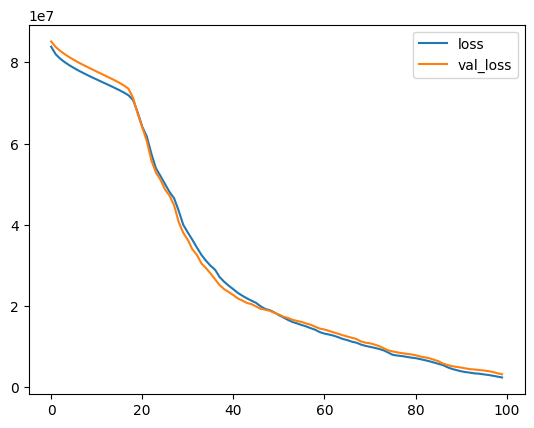

In [173]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();


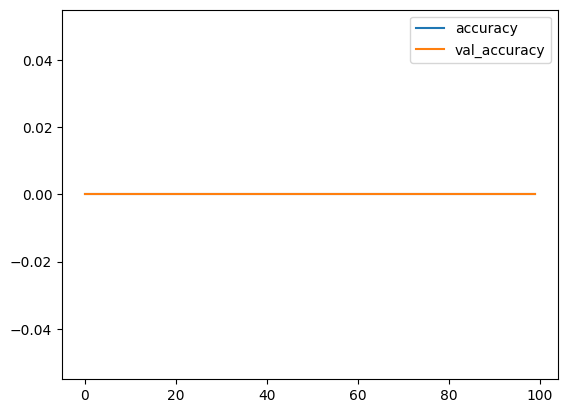

In [175]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [176]:
df.isnull().sum()

RAM       0
Weight    0
Price     0
dtype: int64